In [5]:
import GetOldTweets3 as got
import json
import re
import requests
import csv

In [7]:
csv_columns=["Username","Name","Date","Text", "Retweet", "Favorite","Subjectivity"]
# with open("Twitter_F.csv", 'a') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
#     writer.writeheader()
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('USEReady').setSince("2019-01-01")
print("k")
ctr=0
for tweet in got.manager.TweetManager.getTweets(tweetCriteria):
    csv_columns=["Username","Name","Date","Text", "Retweet", "Favorite","Subjectivity"]
    parsed_tweet={}
    ctr+=1
    parsed_tweet['Username']=tweet.username
    #print("ok")
    parsed_tweet['Name']="USEReady"
    parsed_tweet['Date']=datetime.timestamp(tweet.date)
    parsed_tweet['Text']=tweet.text
    parsed_tweet['Retweet']=tweet.retweets
    parsed_tweet['Favorite']=tweet.favorites
    obj=TwitterClient()
    parsed_tweet['Subjectivity']=obj.get_tweet_sentiment(tweet.text)
    #print("k")
    with open("Twitter_F.csv", 'a') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writerow(parsed_tweet)
print(ctr)

k
239


In [3]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
import tweepy
import pymongo,json
from textblob import TextBlob
import re
from datetime import datetime
class TwitterClient(object): 
    
    def clean_tweet(self, tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
    def get_tweet_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        return analysis.sentiment.subjectivity
            

In [8]:
access_token = "919578385562472448-ZTqEtujcyhZXNU1ilx8DIZTYGZ0nnYO"
access_token_secret = "Fw4lGDoDzLyQWouEi2EqGFqxrGyaWih3AthDzbzI26ioR"
consumer_key = "SLE0ua1H4IcTQIbFrBPCvxIKy"
consumer_secret = "zQK6DQHQoB14rKbzwT3hfFbnazDvpnF5jcxcDztTpWRqw8gl8q"

In [ ]:
class TwitterClient(object): 
    def __init__(self): 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth,wait_on_rate_limit=True,retry_count=100) 
        except: 
            print("Error: Authentication Failed") 
  
    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 
  
    def get_tweet_sentiment(self, tweet):  
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'
  
    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        ''' 
        tweets = [] 
  
        try: 
            fetched_tweets = self.api.search(q = query, count = count, lang="en")
            #print(fetched_tweets)
            for tweet in fetched_tweets:
                parsed_tweet = {}
                date=tweet.created_at
                parsed_tweet['date']= datetime.timestamp(date)
                data=json.dumps(tweet._json)
                tweet=json.loads(data)
                #print(tweet)
                parsed_tweet['sname']= tweet["user"]["name"]
                parsed_tweet['text']=tweet["full_text"]
                parsed_tweet['retweet_count']=tweet["retweet_count"]
                parsed_tweet['favorite_count']=tweet["favorite_count"]
                print(parsed_tweet)
                with open('data.json', 'a') as outfile:
                    json.dump(parsed_tweet, outfile)
#             return tweets 
  
        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 
api = TwitterClient() 
tweets = api.get_tweets(query = 'TV series', count = 100)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Useready.csv",index_col=False)
df.head()

,username,date,text,retweet,favorite,subjectivity
0,MarkBradbourne,2020-05-22 21:29:00,Next week @USEReadyInc is presenting a webinar...,0,0,0.000
1,USEReadyInc,2020-05-22 20:43:49,"Join @UdayaHegde CEO, USEReady and @UR_CHIEFOF...",0,0,0.500
2,USEReadyInc,2020-05-22 12:30:43,"Us too, what times may come!!",0,0,0.000
3,USEReadyInc,2020-05-22 12:25:42,Kudos @Ajenstat and the entire #DataPeople #Ta...,0,0,0.625
4,USEReadyInc,2020-05-21 19:39:49,In collaboration with #Tableau on a #live #web...,4,4,0.500


In [9]:
df["Year"]=pd.DatetimeIndex(df["date"]).year
df1=df.groupby("Year",as_index=False).sum()
df1

,Year,retweet,favorite,subjectivity
0,2019,62,544,343.913018
1,2020,55,210,69.637368


C:\Users\Ritesh Dutta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


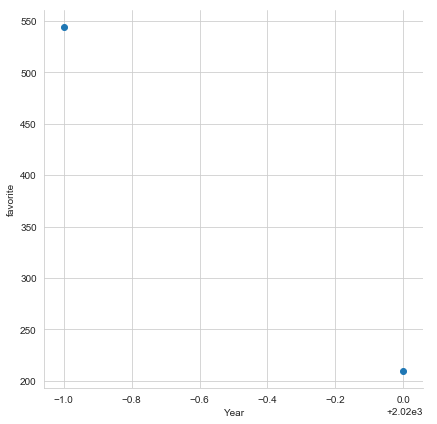

In [10]:
sns.set_style("whitegrid");
sns.FacetGrid(df1, size=6) \
   .map(plt.scatter, "Year", "favorite") \
   .add_legend();
plt.show();

In [2]:
df=pd.read_csv("tweetf2019.csv",index_col=False)
df.head()

,username,date,text,retweet,favorite,subjectivity,name
0,interworks,22-05-2020 23:00,"If you're adept at #Tableau, you've likely mas...",0,0,0.800,Interworks
1,InterWorksEU,22-05-2020 20:31,"Now on the blog, find out how to create custom...",0,0,0.500,Interworks
2,interworks,22-05-2020 20:00,We're thrilled to team up with our partners ov...,0,1,0.575,Interworks
3,InterWorksEU,22-05-2020 16:31,Now that @tableau and @salesforce have teamed ...,0,0,0.650,Interworks
4,DangerandDread,22-05-2020 15:59,If I explained the interworks of the world Del...,0,2,0.750,Interworks


In [3]:
df.groupby('name').count()

,username,date,text,retweet,favorite,subjectivity
name,,,,,,
Interworks,3999,3999,3999,3999,3999,3999
Slalom,7857,7857,7856,7857,7857,7857
USEReady,921,921,921,921,921,921


In [17]:
df=df.dropna()
df.reset_index(drop=True)
df.head()

,username,date,text,retweet,favorite,subjectivity,name
0,interworks,2020-05-22 23:00:00,"If you're adept at #Tableau, you've likely mas...",0,0,0.800,Interworks
1,InterWorksEU,2020-05-22 20:31:00,"Now on the blog, find out how to create custom...",0,0,0.500,Interworks
2,interworks,2020-05-22 20:00:00,We're thrilled to team up with our partners ov...,0,1,0.575,Interworks
3,InterWorksEU,2020-05-22 16:31:00,Now that @tableau and @salesforce have teamed ...,0,0,0.650,Interworks
4,DangerandDread,2020-05-22 15:59:00,If I explained the interworks of the world Del...,0,2,0.750,Interworks


In [26]:
df=df[(df['username']!="InterWorks_IT") & (df['username']!="InterWorksANZ") &(df['username']!="InterworksSA") & (df['username']!="interworkscloud") &(df['username']!="InterworksEDM")&(df['username']!="InterWorksAUS")]
df.to_excel("tweetf2019.xlsx",index=False)

C:\Users\Ritesh Dutta\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:912: UserWarning: Ignoring URL 'http://s.engati.com/2jo%20-%20Your%20Customers%20are%20stressed%20out%20enough%20during%20lockdown,%20donâ€™t%20let%20bad%20experiences%20stress%20them%20further.%20Shep%20Hyken,%20Colin%20Shaw,%20Dan%20Gingiss%20and%20Elise%20Quevedo%20are%20here%20to%20help%20you%20create%20great%20Customer%20Experiences.%20Sign%20up%20for%20the%20FREE%20WEBINAR' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))


In [3]:
dfu=df[(df['name']=="USEReady")&(df['username']=="USEReadyInc")]
len(dfu)

872

In [4]:
dfi=df[((df['username']=="interworks")|(df['username']=="InterWorksEU"))]
len(dfi)

2662

In [34]:
dfs=df[df['name']=="Slalom"]
#dfs.groupby('username').count()
dfs[dfs['username']==""]

,username,date,text,retweet,favorite,subjectivity,name
10722,____YoungA,2019-07-23 02:00:00,@Slalom @SlalomNYC @FortuneMagazine @GPTW_US #...,0,0,0.0,Slalom


In [9]:
dfi.to_csv("test.csv",mode='a',index=False,header=False)

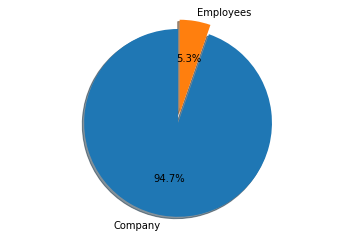

In [5]:
labels = 'Company', 'Employees'
sizes = [872,49]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

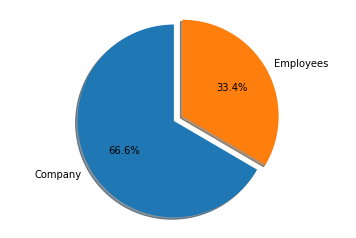

In [6]:
labels = 'Company', 'Employees'
sizes = [2662,1337]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

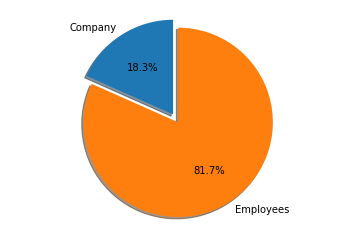

In [7]:
labels = 'Company', 'Employees'
sizes = [1441,6416]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()